In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.DataFrame({
                    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
                    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
                  })


In [4]:
np.random.seed(200)
k=3
centroids = {
    i+1:[np.random.randint(0,80),np.random.randint(0,9)]
    for i in range(k)
    
}
fig = plt.figure(figsize=(5,5))


<Figure size 360x360 with 0 Axes>

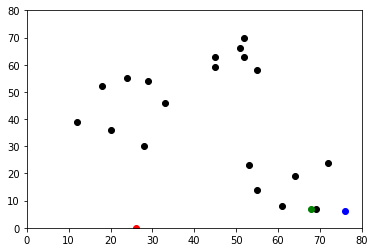

In [6]:
plt.scatter(df['x'],df['y'],color='k')
colmap = {1: 'r',2:'g',3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        41.436699        64.498062        72.006944        1     r
1  20  36        36.496575        56.080300        63.529521        1     r
2  28  30        30.066593        46.141088        53.665631        1     r
3  18  52        52.611786        67.268120        74.027022        1     r
4  29  54        54.083269        61.073726        67.178866        1     r


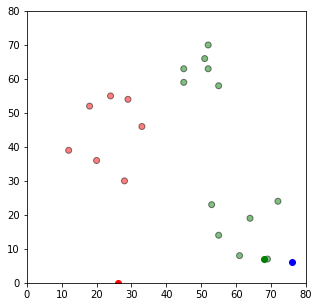

In [12]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()